In [1]:
import requests
import pandas as pd

In [2]:
# Fetch list of exchanges
resp = requests.get('https://api.cryptowat.ch/exchanges')

In [3]:
# Get list of exchange values you can use
exchange_names = [e['symbol'] for e in resp.json()['result'] \
    if e['active']]
exchange_names

['bisq',
 'bithumb',
 'bittrex',
 'bitfinex',
 'bitstamp',
 'cexio',
 'gemini',
 'binance',
 'okx',
 'ftx-us',
 'comex',
 'nymex',
 'cme',
 'uniswap-v2',
 'liquid',
 'okcoin',
 'hitbtc',
 'bitmex',
 'huobi',
 'coinbase-pro',
 'kraken',
 'bitflyer',
 'luno',
 'binance-us',
 'ftx',
 'kucoin',
 'coinone',
 'kraken-futures',
 'poloniex',
 'zonda',
 'gateio',
 'deribit']

In [4]:
# Select Gemini
EXCHANGE = 'kucoin'
# Fetch markets on the exchange
exchange_resp = requests.get(f'https://api.cryptowat.ch/markets/{EXCHANGE}')

In [5]:
# See all the pairs in the market
pairs = [i['pair'] for i in exchange_resp.json()['result'] \
    if i['active']]
pairs

['reqeth',
 'reqbtc',
 'nulseth',
 'nulsbtc',
 'cvcbtc',
 'snteth',
 'sntbtc',
 'ppteth',
 'pptbtc',
 'bsvbtc',
 'powrbtc',
 'powreth',
 'bcdbtc',
 'bcdeth',
 'knceth',
 'kncbtc',
 'omgeth',
 'omgbtc',
 'chsbbtc',
 'chsbeth',
 'manabtc',
 'ambeth',
 'manaeth',
 'ambbtc',
 'etnbtc',
 'dgbbtc',
 'dgbeth',
 'qtumbtc',
 'aioneth',
 'aionbtc',
 'enjbtc',
 'enjeth',
 'snxeth',
 'timeeth',
 'snxusdt',
 'snxbtc',
 'timebtc',
 'xlmusdt',
 'vetusdt',
 'dasheth',
 'utkbtc',
 'utketh',
 'dashbtc',
 'gousdt',
 'axpreth',
 'axprbtc',
 'eoskcs',
 'etceth',
 'eosbtc',
 'etcbtc',
 'eosusdt',
 'eoseth',
 'gasbtc',
 'bchbtc',
 'etcusdt',
 'denteth',
 'dentbtc',
 'drgnbtc',
 'drgneth',
 'ltcusdt',
 'ltceth',
 'ltcbtc',
 'keybtc',
 'keyeth',
 'iosteth',
 'iostbtc',
 'telbtc',
 'waxpbtc',
 'teleth',
 'waxpeth',
 'tkybtc',
 'tkyeth',
 'elfeth',
 'coveth',
 'zilbtc',
 'elfbtc',
 'ltckcs',
 'manbtc',
 'covbtc',
 'zileth',
 'tomoeth',
 'ontbtc',
 'gobtc',
 'tomobtc',
 'baxeth',
 'lymeth',
 'traceth',
 'iotxeth'

In [11]:
# you an verify that it is the correct pairing by checking here
PAIR = 'btcusdc'
# Verify Pair exists
pair_resp = requests.get(f'https://api.cryptowat.ch/pairs/{PAIR}')

In [12]:
# Date Parameters
START_DATE = '12/8/2021'
END_DATE = '1/8/2022'
PERIOD = 86400  # Time period in seconds (e.g., 1 day = 86400)

In [13]:
# Convert the dates to timestamps
from datetime import datetime
def to_timestamp(dateString):
    element = datetime.strptime(dateString, '%m/%d/%Y')
    return int(datetime.timestamp(element))
# Will be used later to convert back
def to_date(timestamp):
    dt = datetime.fromtimestamp(timestamp)
    return dt.strftime('%m/%d/%Y')
start_ts = to_timestamp(START_DATE)
end_ts = to_timestamp(END_DATE)

In [14]:
# Fetch the data
params = {
  'after': start_ts,
  'before': end_ts,
  'periods': PERIOD,
}
ohlc_resp = requests.get(
    f'https://api.cryptowat.ch/markets/{EXCHANGE}/{PAIR}/ohlc',
    params=params)
ohlc_resp.json()['result'][f'{PERIOD}']

[[1638921600,
  50517,
  51969.5,
  50000.1,
  50632.8,
  64.78832672,
  3300373.448107939],
 [1639008000, 50650, 51188.7, 48088, 50527, 115.19834227, 5795308.993639552],
 [1639094400,
  50548.4,
  50828,
  46300.1,
  47610.8,
  105.94314462,
  5112207.697144191],
 [1639180800,
  47644.1,
  50126.5,
  46871.3,
  47069.2,
  90.23933729,
  4352205.359859905],
 [1639267200, 47091.5, 49514, 46755, 49409.8, 58.2426677, 2817812.927174752],
 [1639353600,
  49414.1,
  50818.7,
  48675.4,
  50092.8,
  52.90646208,
  2636024.019966182],
 [1639440000,
  50068.1,
  50208.7,
  45740.9,
  46666.3,
  92.48783219,
  4405503.470892106],
 [1639526400,
  46640.2,
  48716.2,
  46213.4,
  48432,
  77.02752302,
  3629883.070240419],
 [1639612800,
  48314.3,
  49664.7,
  46485.1,
  48898.8,
  69.2393987,
  3330840.8558133566],
 [1639699200,
  48909,
  49449.5,
  47543.7,
  47618.3,
  47.78289673,
  2315570.597360742],
 [1639785600,
  47647.8,
  47998.8,
  45499.9,
  46140.8,
  49.36060927,
  2310039.73405679

In [15]:
class Ohlc():
        def __init__(self, tuple):
            (self.close_ts,
            self.open,
            self.high,
            self.low,
            self.close,
            self.volume,
            self.quote_volume) = tuple
            self.close_dt = to_date(self.close_ts)
        def __repr__(self):
            return pp.pformat({
                'close_dt': self.close_ts,
                'price': {
                'open': self.open,
                'high': self.high,
                'low': self.low,
                'close': self.close,
                },
            })
ohlcs = [Ohlc(i) for i in ohlc_resp.json()['result'][f'{PERIOD}']]

In [18]:
# Convert timestamp to date object in each row
data = [tuple([datetime.fromtimestamp(i[0])] + i[1:]) \
    for i in ohlc_resp.json()['result'][f'{PERIOD}']]
    # Create dataframe
columns = ['date', 'open', 'high', 'low','close',\
'volume', 'qt_volume']
df = pd.DataFrame.from_records(data, columns=columns)

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['close'],order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                   31
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -269.128
Date:                Fri, 06 May 2022   AIC                            546.256
Time:                        10:32:33   BIC                            551.992
Sample:                             0   HQIC                           548.126
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.794e+04    830.221     57.738      0.000    4.63e+04    4.96e+04
ar.L1          0.5782      0.225      2.565      0.010       0.136       1.020
ma.L1          0.3476      0.317      1.097      0.273      -0.273       0.969
sigma2       1.98e+06   6.17e+05      3.212      0.001    7.72e+05    3.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.83   Prob(JB):                         0.79
Heteroskedasticity (H):               0.87   Skew:                            -0.08
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/shashank/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


<AxesSubplot:>

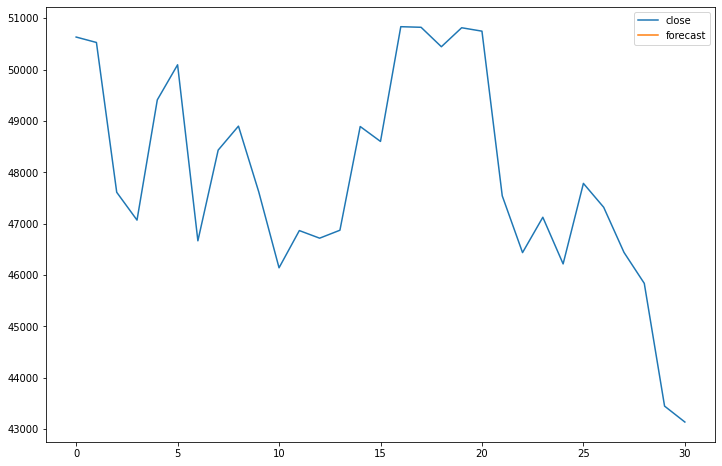

In [21]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['close','forecast']].plot(figsize=(12,8))

/home/shashank/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/shashank/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/shashank/lib/python3.6/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


<AxesSubplot:>

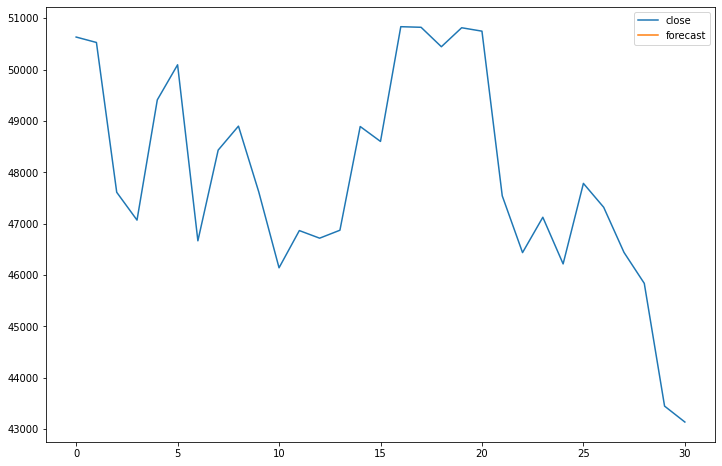

In [22]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['close','forecast']].plot(figsize=(12,8))

In [24]:
df.to_csv('dataset.csv')